<a href="https://colab.research.google.com/github/aysegullkadiroglu/techcareer-ml-bootcamp/blob/main/hws/Wine_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains information about different types of wines. It includes measurements of 13 chemical components for each type of wine. The wines are derived from three different grape varieties, and the data is provided for analysis and clustering purposes.

K-Means and DBSCAN, two unsupervised learning algorithms, will be applied to the data set and compared.

# *Veri Keşfi ve Ön İzleme*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from itertools import product
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = '/content/wine-clustering.csv'
df = pd.read_csv(data)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [4]:
df.shape

(178, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [7]:
df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

In [8]:
# Veri setinde boş eleman varsa her bir özelliğe göre toplam boş eleman sayısı
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

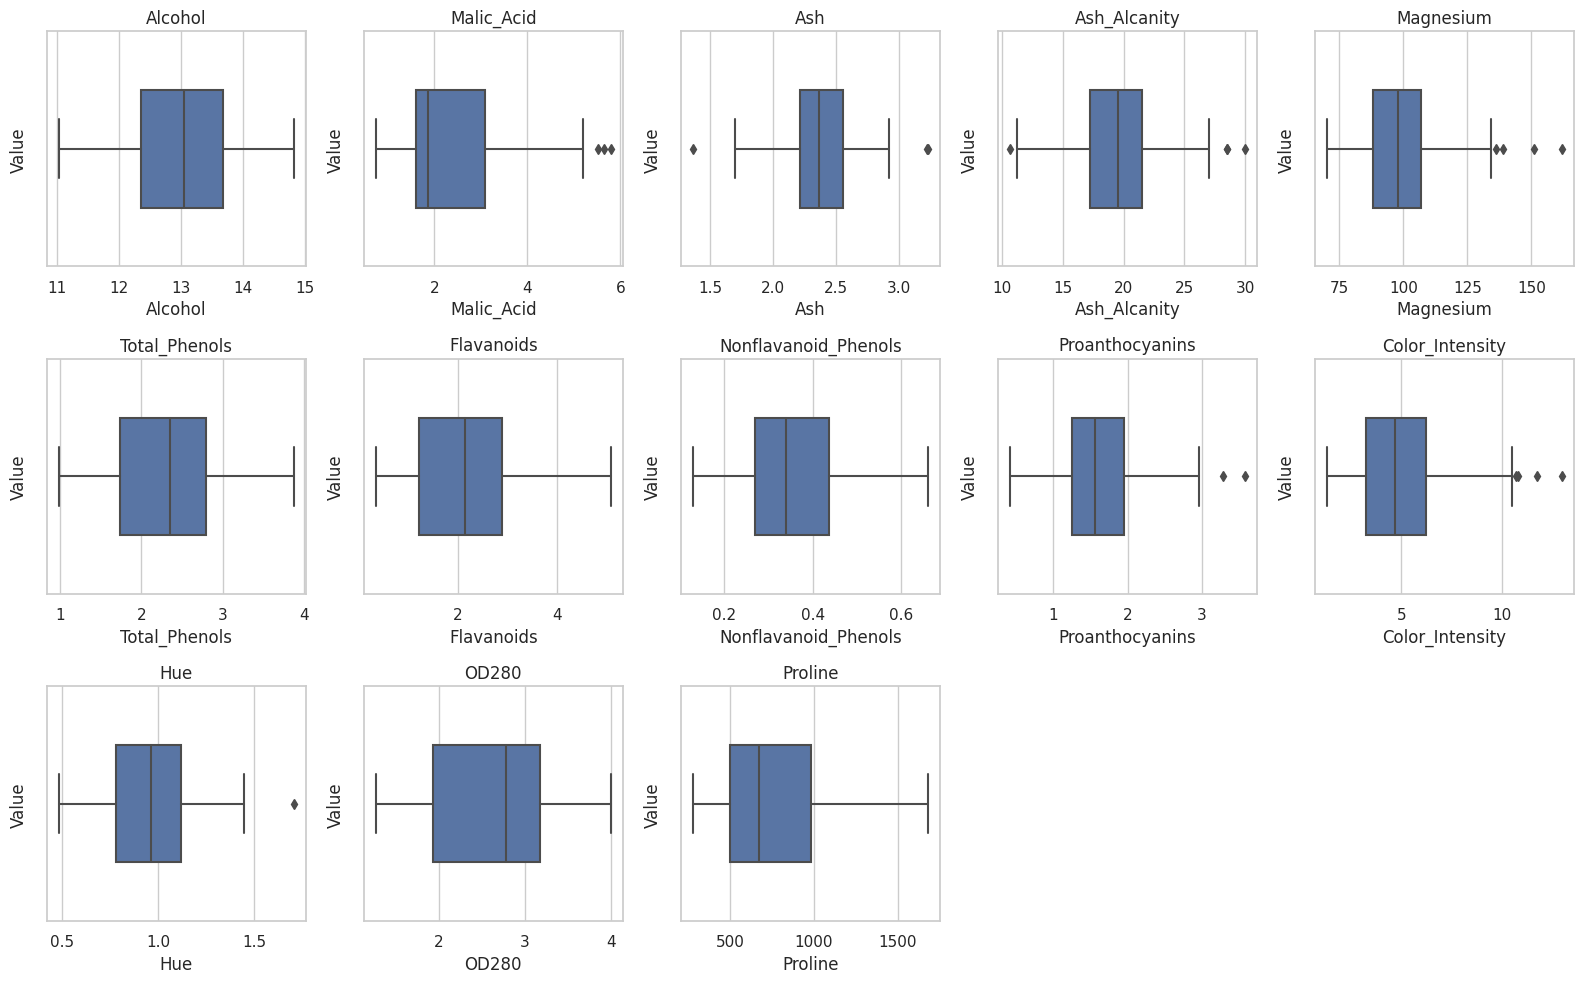

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,10))

for i, column in enumerate(df.columns):
  plt.subplot(3, 5, i+1)
  sns.boxplot(x=df[column], orient="v", width=0.5)
  plt.title(column)
  plt.ylabel("Value")

plt.tight_layout()
plt.show()

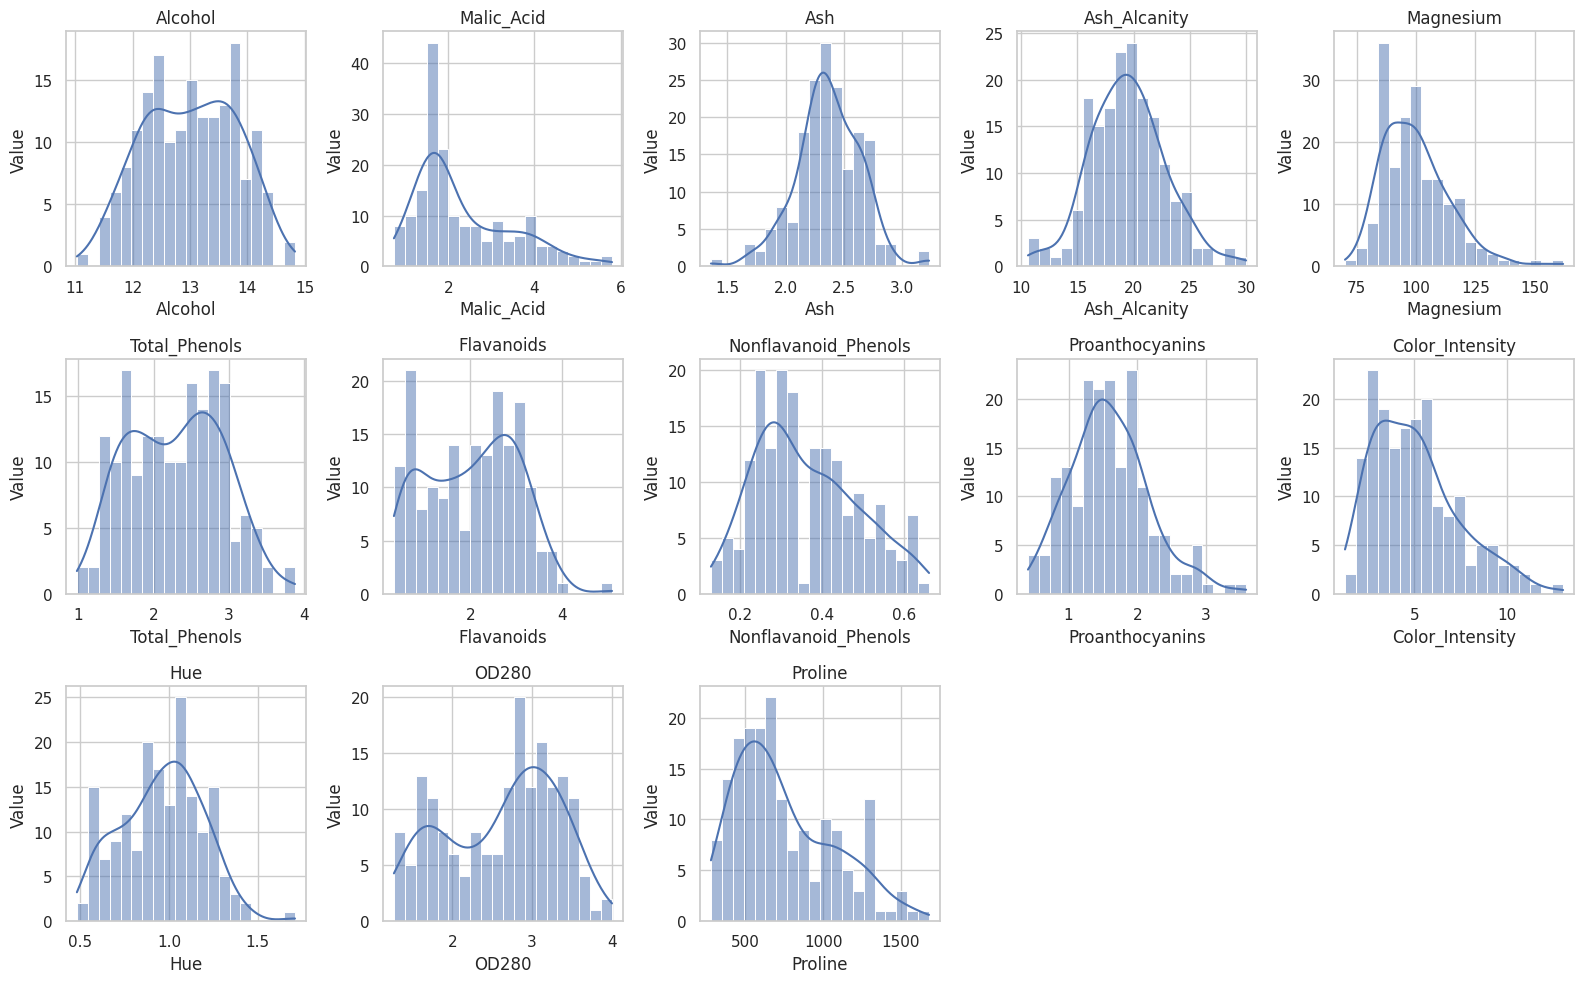

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,10))

for i, column in enumerate(df.columns):
  plt.subplot(3, 5, i+1)
  # kde (kernel density estimate) değeri her bir yoğunluk fonksiyonunun
  # tahminini sağlayan o çizgilerdir.
  sns.histplot(x=df[column], kde=True, bins=20) # bin = aralık belirlendi
  plt.title(column)
  plt.ylabel("Value")

plt.tight_layout()
plt.show()

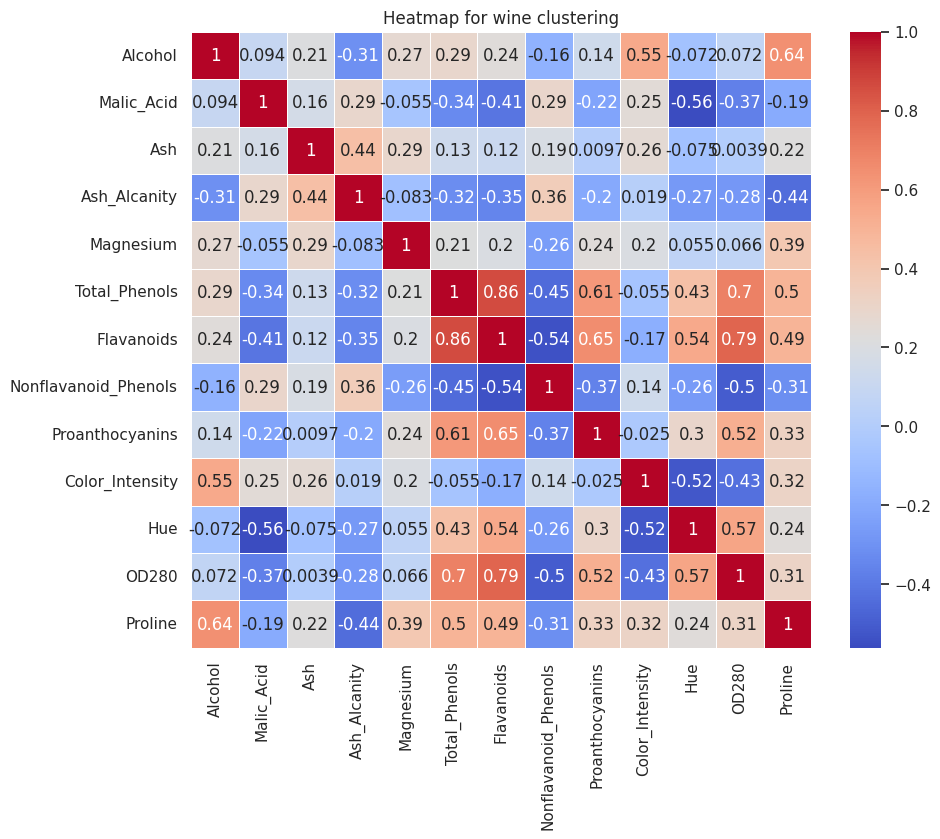

In [11]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap for wine clustering")
plt.show()

In [12]:
# IQR ( Çeyrekler Arası Metot ) kullanılarak outliers tespiti
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
number_of_outliers = outliers.sum()
print(f"Number of outliers using IQR method: {number_of_outliers}")

wine_data_outliers = df[outliers]
wine_data_outliers

Number of outliers using IQR method: 17


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562
115,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380


In [13]:
df_copy = df.copy()

In [14]:
# Alkol oranına göre kategorize etme
bins = [11, 12.5, 14.83]
labels = ["low", "high"]

df_copy['Alcohol Category'] = pd.cut(df_copy['Alcohol'], bins=bins, labels=labels)
df_copy

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Alcohol Category
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,high
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,high
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,high
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,high
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,high
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,high
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,high
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,high


In [15]:
df_copy['Alcohol^2'] = df_copy['Alcohol'] ** 2
df_copy['Malic_Acid^3'] = df_copy['Malic_Acid'] ** 3
df_copy

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Alcohol Category,Alcohol^2,Malic_Acid^3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,high,202.4929,5.000211
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,high,174.2400,5.639752
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,high,173.1856,13.144256
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,high,206.4969,7.414875
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,high,175.2976,17.373979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,high,187.9641,180.362125
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,high,179.5600,59.776471
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,high,176.0929,78.402752
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,high,173.4489,17.373979


In [16]:
# Hue ve OD280 özelliklerini birleştirme
# OD280: 280nm'de optik yoğunluğun varyansının analizi
df_copy['Hue x OD Ratio'] = df_copy['Hue'] * df_copy['OD280']
df_copy

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Alcohol Category,Alcohol^2,Malic_Acid^3,Hue x OD Ratio
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,high,202.4929,5.000211,4.0768
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,high,174.2400,5.639752,3.5700
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,high,173.1856,13.144256,3.2651
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,high,206.4969,7.414875,2.9670
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,high,175.2976,17.373979,3.0472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,high,187.9641,180.362125,1.1136
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,high,179.5600,59.776471,1.0920
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,high,176.0929,78.402752,0.9204
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,high,173.4489,17.373979,0.9720


In [17]:
df_copy['Alcohol x Color Intensity'] = df_copy['Alcohol'] * df_copy['Color_Intensity']
df_copy

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Alcohol Category,Alcohol^2,Malic_Acid^3,Hue x OD Ratio,Alcohol x Color Intensity
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,high,202.4929,5.000211,4.0768,80.2572
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,high,174.2400,5.639752,3.5700,57.8160
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,high,173.1856,13.144256,3.2651,74.7488
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,high,206.4969,7.414875,2.9670,112.0860
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,high,175.2976,17.373979,3.0472,57.1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,high,187.9641,180.362125,1.1136,105.5670
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,high,179.5600,59.776471,1.0920,97.8200
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,high,176.0929,78.402752,0.9204,135.3540
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,high,173.4489,17.373979,0.9720,122.4810


In [18]:
df_copy['Alcohol - Ash'] = df_copy['Alcohol'] - df_copy['Ash']
df_copy

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Alcohol Category,Alcohol^2,Malic_Acid^3,Hue x OD Ratio,Alcohol x Color Intensity,Alcohol - Ash
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,high,202.4929,5.000211,4.0768,80.2572,11.80
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,high,174.2400,5.639752,3.5700,57.8160,11.06
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,high,173.1856,13.144256,3.2651,74.7488,10.49
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,high,206.4969,7.414875,2.9670,112.0860,11.87
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,high,175.2976,17.373979,3.0472,57.1968,10.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,high,187.9641,180.362125,1.1136,105.5670,11.26
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,high,179.5600,59.776471,1.0920,97.8200,10.92
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,high,176.0929,78.402752,0.9204,135.3540,11.01
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,high,173.4489,17.373979,0.9720,122.4810,10.80


In [19]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# *K-Means Algoritması*

In [20]:
# Veriyi normalleştirme (standartlaştırma)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [21]:
# PCA ( Temel Bileşen Analizi ) sayesinde yüksek boyutlu verileri
# daha düşük boyutlu alanda görselleştirir.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)
pca_data = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

print('Shape after PCA: ', pca_data.shape)
print('Original shape: ', df_scaled.shape)

Shape after PCA:  (178, 2)
Original shape:  (178, 13)


Text(0.5, 1.0, 'PCA Plot')

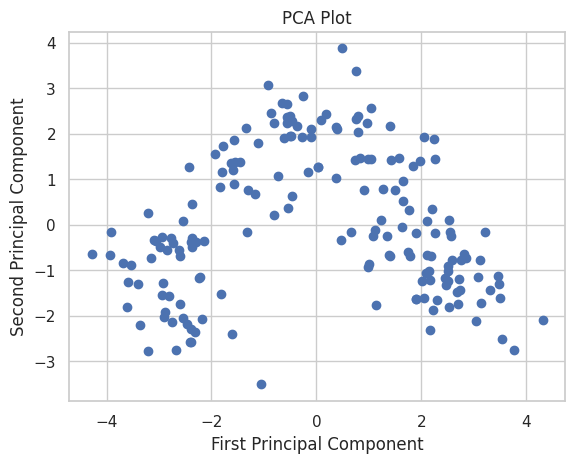

In [22]:
plt.scatter(pca_data.iloc[:,0],pca_data.iloc[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Plot')

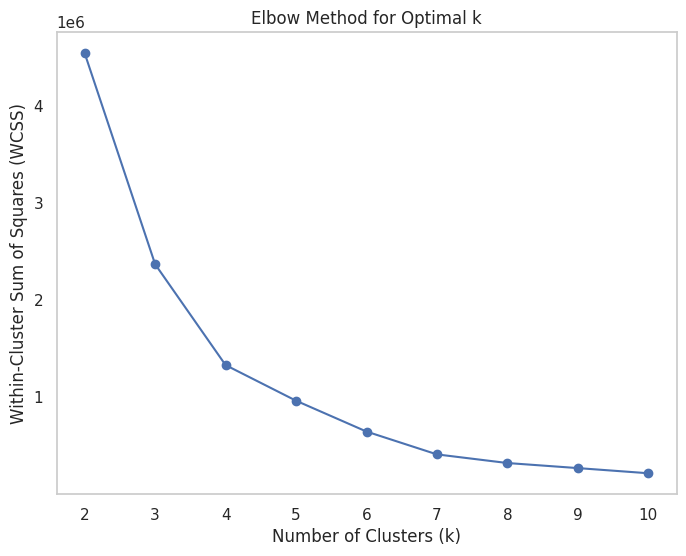

In [23]:
# Elbow yöntemi
wcss = []

# range'e göre k değerlerinin hesaplanması
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, n_init=15, random_state=4)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

# Grafik gösterimi
plt.figure(figsize=(8,6))
plt.plot(range(2,11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

In [24]:
# K-Means Modelini uyguluyorum
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=1)

clusters = kmeans.fit_predict(df_scaled)

# merkezleri belirleme
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

Text(0, 0.5, 'Principal Component 2')

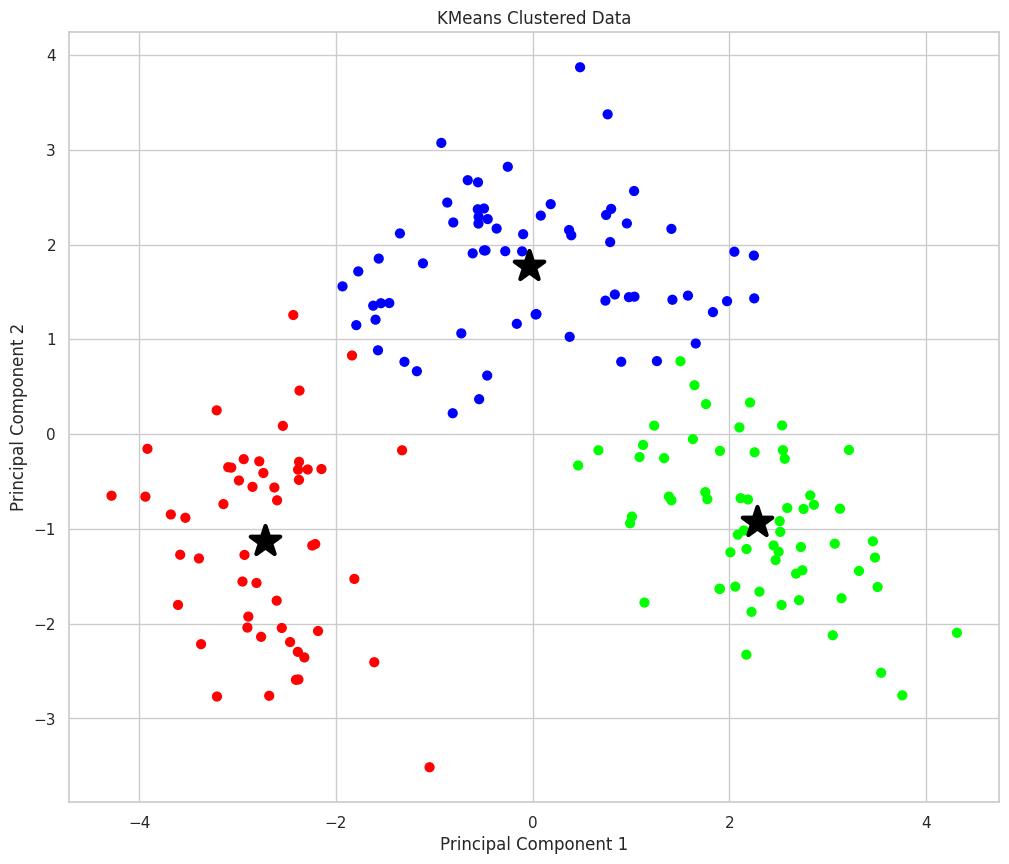

In [25]:
# K-Means uygulanan PCA'nin grafiğini çıkarma
plt.figure(figsize=(12,10))
plt.scatter(pca_data.iloc[:,0], pca_data.iloc[:,1],
            c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1],
            marker="*", s=500, linewidths=3, color="black")
plt.title('KMeans Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# *DBSCAN Algoritması*

In [26]:
# Silhouette score'u ölçen bir fonksiyon
# eps ve minpts değerlerini alabilmek için
def my_silhouette_score(model, X, y=None):
  # modeli fit etme
  preds = model.fit_predict(X)
  # en az iki tane farklı küme etiketi varsa hesapla, bir tane is nan döner
  return silhouette_score(X, preds) if len(set(preds)) > 1 else float('nan')


model = DBSCAN()

# Gridearch kullanımını gerçekleştirmek için olası kombinasyonları girdik
pgrid = {
    'eps': [0.1, 0.5, 1.0, 1.5],
    'min_samples': range(2,10)
}

gs = GridSearchCV(model, pgrid, scoring=my_silhouette_score).fit(df_scaled)
# pgrid'de verilen parametrelere oranla bulduğu en iyi modeli alır
best_estimator = gs.best_estimator_
highest_silhouette_score = gs.score(df_scaled)

print("Best EPS:", best_estimator.eps)
print("Best MinPts:", best_estimator.min_samples)
print("Highest Silhouette Score:", highest_silhouette_score)

Best EPS: 1.5
Best MinPts: 2
Highest Silhouette Score: -0.2593113145392012


In [27]:
# Bulunan eps ve minpts değerleriyle dbscan
dbscan = DBSCAN(eps=1.5, min_samples=2)

dbscan_label = dbscan.fit_predict(pca_data)

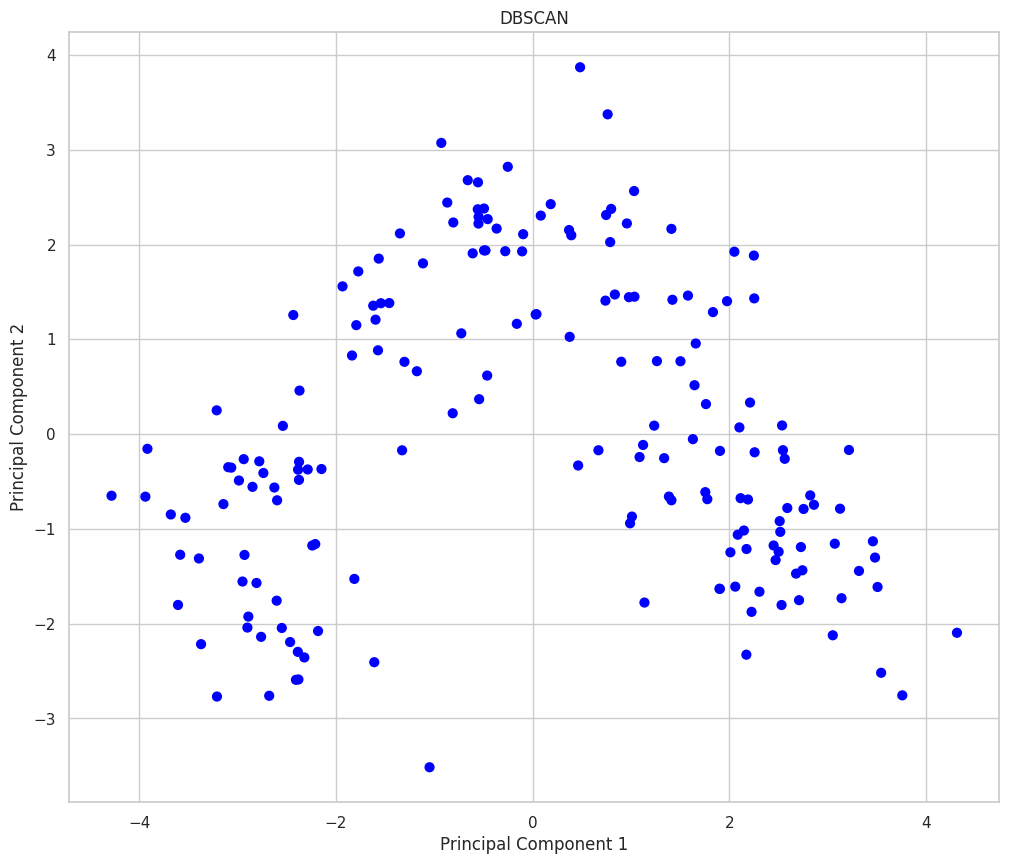

In [31]:
plt.figure(figsize=(12,10))
# Plot data points that belong to clusters (labels other than -1)
plt.scatter(pca_data.iloc[dbscan_label != -1, 0],
            pca_data.iloc[dbscan_label != -1, 1],
            c=dbscan_label[dbscan_label != -1],
            cmap="brg", s=40, label="Clustered Points")

# Plot outliers (points with label -1) in a different color
plt.scatter(pca_data.iloc[dbscan_label == -1, 0],
            pca_data.iloc[dbscan_label == -1, 1],
            color="gray", marker="*", s=60, label="Outliers")

plt.title('DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Veri seti DBSCAN yapılmaya uygun değil gibi görünüyor. Belki de kullanılan metot yanlış. eps ve minpts değerlerini değiştirirek ve araştırma yapılarak farklı sonuç elde edilip edilemeyeceğini görelim.

In [32]:
# eps ve min_samples değerlini değiştirerek yeniden dbscan
dbscan = DBSCAN(eps=0.5, min_samples=4)

dbscan_label = dbscan.fit_predict(pca_data)

In [33]:
dbscan_label

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  3,  1,  1,  2, -1,  3,  0,  0,  3,
       -1,  0,  1,  0, -1,  0,  0,  3,  3,  1,  0,  2, -1,  0,  3,  4,  0,
        3,  3,  3,  1,  3,  1,  1,  1,  3,  3,  0, -1,  3,  0,  3,  3,  3,
        2,  3,  3,  1,  3,  1,  3,  0,  0,  3,  1,  3,  3, -1,  3,  3, -1,
        3,  0,  0,  1, -1,  0,  3,  2,  1,  3,  1, -1,  4,  4,  4,  4,  4,
       -1,  4,  4,  4,  4,  4,  4,  4, -1,  4,  4,  4,  4,  4,  4,  4, -1,
        4,  4, -1,  4,  4, -1, -1,  4, -1,  4,  4,  4,  4,  4,  4,  4,  4,
       -1,  4,  4, -1,  4,  4,  4, -1])

In [34]:
import matplotlib.colors as mcolors

colors = list(mcolors.TABLEAU_COLORS.values())
colors.append('black')  # Add black color for outliers

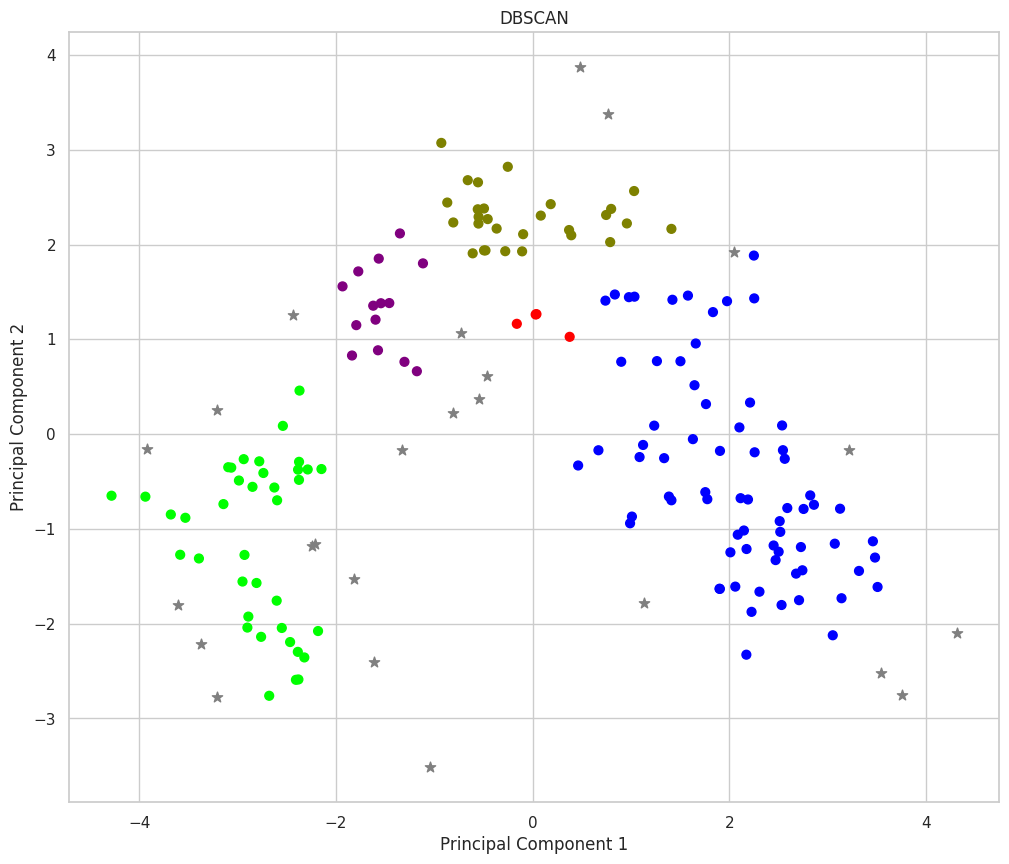

In [35]:
plt.figure(figsize=(12,10))
# Plot data points that belong to clusters (labels other than -1)
plt.scatter(pca_data.iloc[dbscan_label != -1, 0], pca_data.iloc[dbscan_label != -1, 1],
            c=dbscan_label[dbscan_label != -1], cmap="brg", s=40, label="Clustered Points")

# Plot outliers (points with label -1) in a different color
plt.scatter(pca_data.iloc[dbscan_label == -1, 0], pca_data.iloc[dbscan_label == -1, 1],
            color="gray", marker="*", s=60, label="Outliers")

plt.title('DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Sonuçlar öncekinden çok farklı, doğru mu yanlış mı emin değilim.